In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

/kaggle/input/air-passengers/AirPassengers.csv


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/air-passengers/AirPassengers.csv")

In [3]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [4]:
df = pd.read_csv("/kaggle/input/air-passengers/AirPassengers.csv", parse_dates = ['Month'])

In [5]:
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [6]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
df = pd.read_csv("/kaggle/input/air-passengers/AirPassengers.csv", parse_dates = ['Month'], index_col=['Month'])

In [8]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
df['1951-04-01' : '1952-03-01']

,#Passengers
Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [10]:
df.loc['1960-05-01']

#Passengers    472
Name: 1960-05-01 00:00:00, dtype: int64

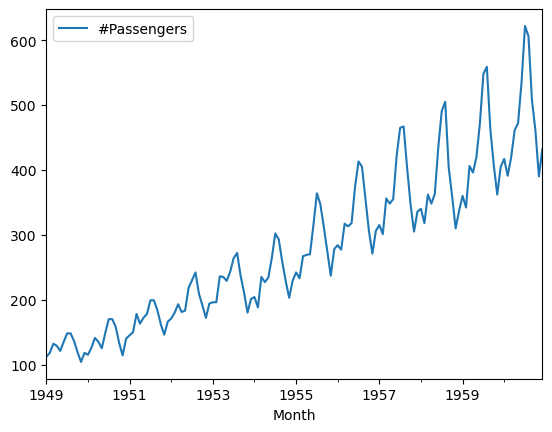

In [11]:
df.plot()
plt.show()

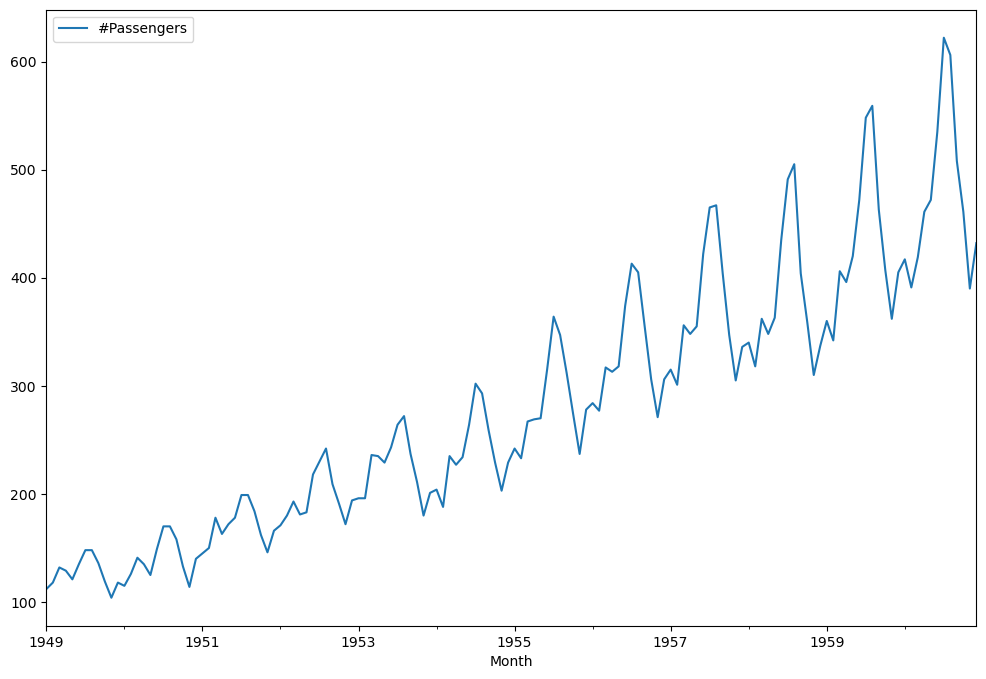

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df.plot()
plt.show()

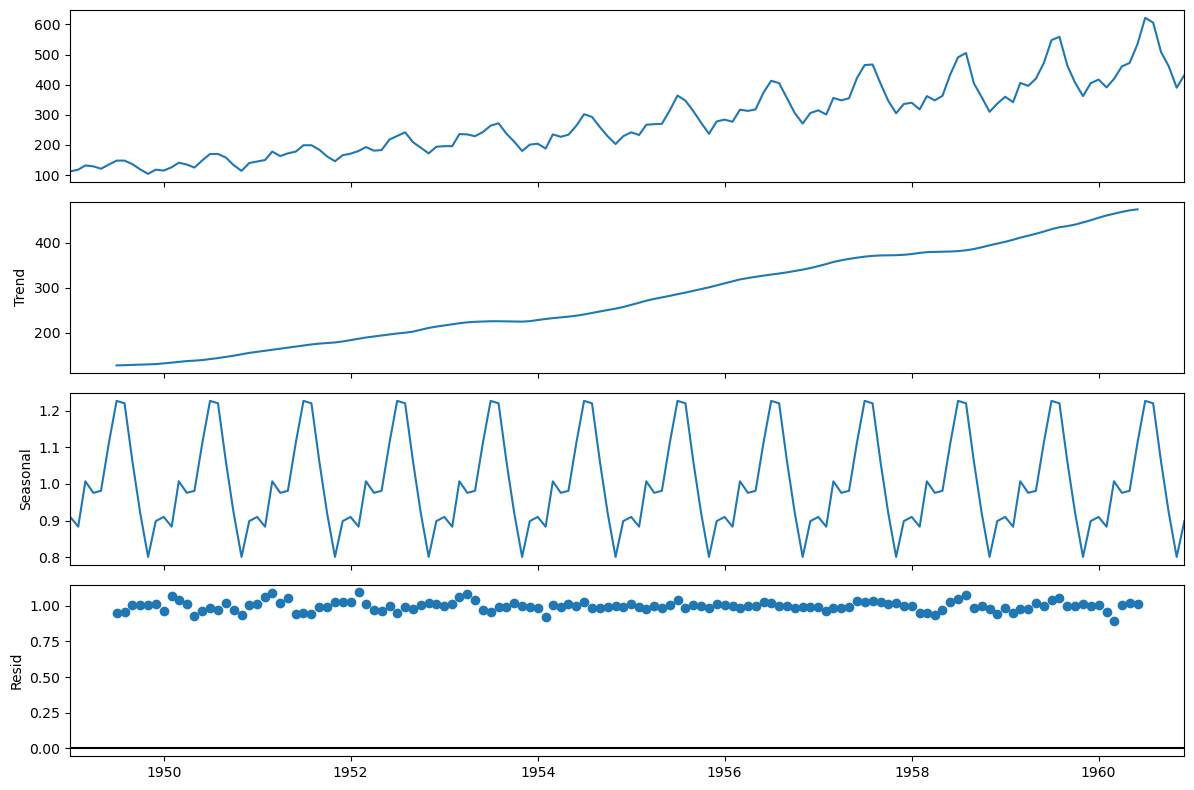

In [13]:
df_mul_decompose = seasonal_decompose(df, model="multiplicative")
df_mul_decompose.plot()
plt.show()

In [14]:
df.rename(columns = {'#Passengers' : 'Passengers'}, inplace = True)

In [15]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [16]:
df_log = df.copy()

In [17]:
df_log['Passengers'] = np.log(df)

In [18]:
df_log.Passengers

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Passengers, Length: 144, dtype: float64

<Axes: xlabel='Month'>

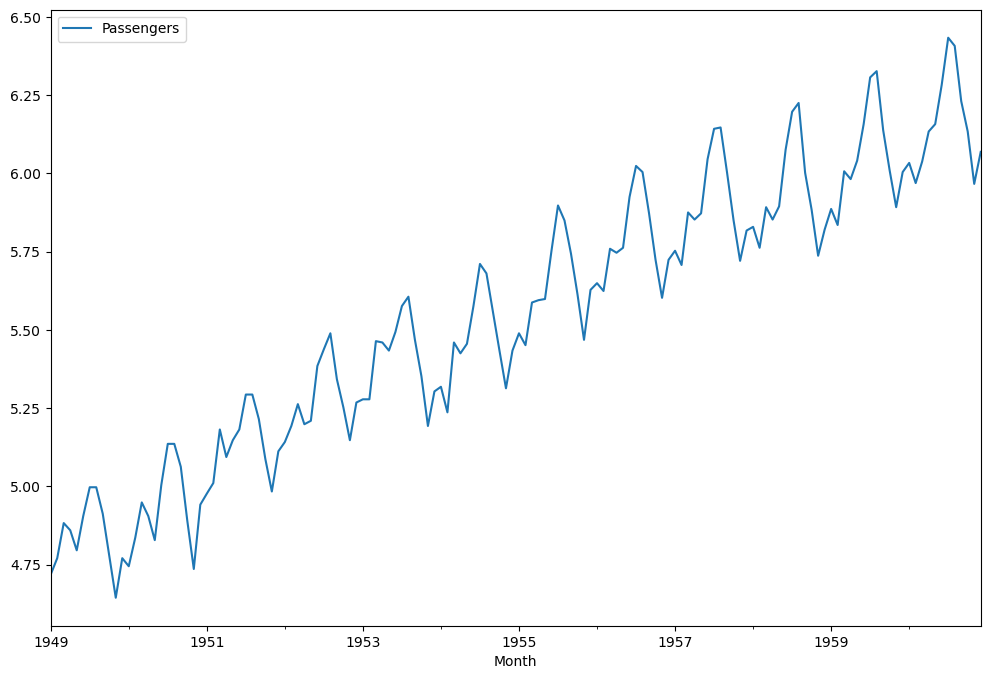

In [19]:
df_log.plot()

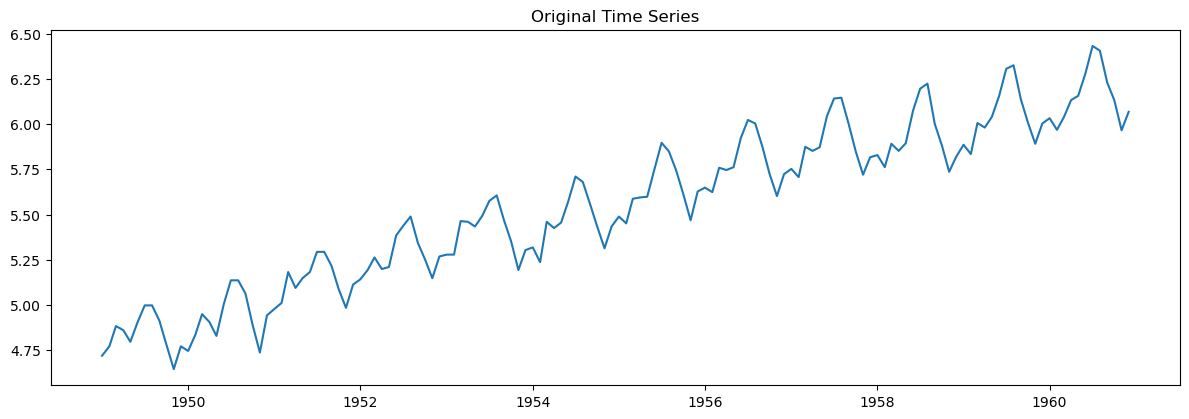

In [20]:
plt.subplot(2, 1, 1)
plt.title('Original Time Series')
plt.plot(df_log)
plt.tight_layout()